<a href="https://colab.research.google.com/github/SamB83/TFforAIGooColab/blob/master/IMDBSub8KwSingleLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Single Layer LSTM

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

1.14.0


In [2]:
# If the tf.__version__ is 1.x, please run this cell
!pip install tensorflow==2.0.0-beta0

     |████████████████████████████████| 87.9MB 51.6MB/s 
     |████████████████████████████████| 3.1MB 35.6MB/s 
     |████████████████████████████████| 501kB 46.0MB/s 
  Found existing installation: tensorflow 1.14.0
    Uninstalling tensorflow-1.14.0:
      Successfully uninstalled tensorflow-1.14.0


In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.0.0-beta0


In [2]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

W0704 23:56:25.666691 140443223910272 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow_datasets/core/file_format_adapter.py:209: tf_record_iterator (from tensorflow.python.lib.io.tf_record) is deprecated and will be removed in a future version.
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/0.1.0. Subsequent calls will reuse this data.


In [7]:
print(info)


#print('From 2 batches take 5 ex each')
#samp_train_dataset = train_dataset.batch(5).take(2)
print('From 1 batches take 1 ex ...')
samp_train_dataset = train_dataset.batch(1).take(1)

# for dat in samp_train_dataset:
#   print(dat)

print('The info object contains the tokenizer that was used to tokenize the dataset .........')
tokenizer = info.features['text'].encoder

for data, label in samp_train_dataset:
  print(data)
  print(label)
  print(tokenizer.decode(data.numpy()[0]))

tfds.core.DatasetInfo(
    name='imdb_reviews',
    version=0.1.0,
    description='Large Movie Review Dataset.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.',
    urls=['http://ai.stanford.edu/~amaas/data/sentiment/'],
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=8185>)
    },
    total_num_examples=100000,
    splits={
        'test': <tfds.core.SplitInfo num_examples=25000>,
        'train': <tfds.core.SplitInfo num_examples=25000>,
        'unsupervised': <tfds.core.SplitInfo num_examples=50000>
    },
    supervised_keys=('text', 'label'),
    citation='"""
        @InProceedings{maas-EtAl:2011:ACL-HLT2011,
          autho

In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes)
test_dataset = test_dataset.padded_batch(BATCH_SIZE, test_dataset.output_shapes)

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10


W0705 00:06:37.636182 140443223910272 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


391/391 [==============================] - 1785s 5s/step - loss: 0.5953 - accuracy: 0.6761 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
391/391 [==============================] - 1553s 4s/step - loss: 0.3865 - accuracy: 0.8367 - val_loss: 0.3915 - val_accuracy: 0.8382
Epoch 3/10
391/391 [==============================] - 1534s 4s/step - loss: 0.2859 - accuracy: 0.8871 - val_loss: 0.4132 - val_accuracy: 0.8238
Epoch 4/10
391/391 [==============================] - 1543s 4s/step - loss: 0.2759 - accuracy: 0.8906 - val_loss: 0.4250 - val_accuracy: 0.8264
Epoch 5/10
391/391 [==============================] - 1486s 4s/step - loss: 0.2151 - accuracy: 0.9190 - val_loss: 0.4270 - val_accuracy: 0.8487
Epoch 6/10
391/391 [==============================] - 1510s 4s/step - loss: 0.1988 - accuracy: 0.9233 - val_loss: 0.4657 - val_accuracy: 0.8168
Epoch 7/10
391/391 [==============================] - 1480s 4s/step - loss: 0.2043 - accuracy: 0.9226 - val_loss: 0.5329 - val_accuracy: 0.

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

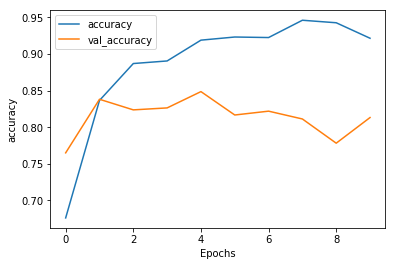

In [14]:
plot_graphs(history, 'accuracy')

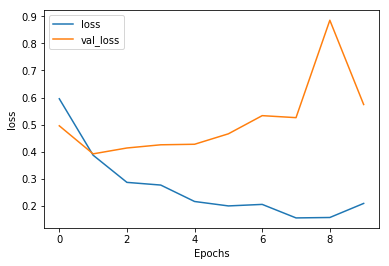

In [15]:
plot_graphs(history, 'loss')